## Text mining techniques

### Libraries

In [46]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [47]:
text = "Text preprocessing is an essential step in natural language processing. It includes tasks like removing stop words, stemming, and tokenizing the text. These steps help in reducing the dimensionality of the data and making it easier to analyze. By transforming the text into structured representations, machine learning models can better understand and process the information."


### Tokenization

Tokenization is the process of splitting text into smaller pieces, called tokens. These tokens can be words, phrases, or even characters. In most NLP (Natural Language Processing) tasks, tokens are usually words.

In [48]:
# Download the punkt tokenizer
# nltk.download('punkt')
# nltk.download('punkt_tab')

# Tokenize the text using nltk
tokens = nltk.word_tokenize(text)

# Display the tokenized words
print("Tokenized words:")
print(tokens)

Tokenized words:
['Text', 'preprocessing', 'is', 'an', 'essential', 'step', 'in', 'natural', 'language', 'processing', '.', 'It', 'includes', 'tasks', 'like', 'removing', 'stop', 'words', ',', 'stemming', ',', 'and', 'tokenizing', 'the', 'text', '.', 'These', 'steps', 'help', 'in', 'reducing', 'the', 'dimensionality', 'of', 'the', 'data', 'and', 'making', 'it', 'easier', 'to', 'analyze', '.', 'By', 'transforming', 'the', 'text', 'into', 'structured', 'representations', ',', 'machine', 'learning', 'models', 'can', 'better', 'understand', 'and', 'process', 'the', 'information', '.']


In [49]:
# Tokenize the text using regular expressions
tokens = re.findall(r'\b\w+\b', text)

# Display the tokenized words
print("Tokenized words:")
print(tokens)

Tokenized words:
['Text', 'preprocessing', 'is', 'an', 'essential', 'step', 'in', 'natural', 'language', 'processing', 'It', 'includes', 'tasks', 'like', 'removing', 'stop', 'words', 'stemming', 'and', 'tokenizing', 'the', 'text', 'These', 'steps', 'help', 'in', 'reducing', 'the', 'dimensionality', 'of', 'the', 'data', 'and', 'making', 'it', 'easier', 'to', 'analyze', 'By', 'transforming', 'the', 'text', 'into', 'structured', 'representations', 'machine', 'learning', 'models', 'can', 'better', 'understand', 'and', 'process', 'the', 'information']


#### Stopwords

Stopwords are commonly used words (like "the", "is", "in", "and") that don't carry much meaning and are often removed during text processing. 

In [50]:
# Download necessary resources if not already downloaded
# nltk.download('stopwords')

# Load the stopwords in English
stop_words = set(stopwords.words('english'))

# Remove punctuation and stopwords
cleaned_tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

# Display the cleaned words
print(cleaned_tokens)

['Text', 'preprocessing', 'essential', 'step', 'natural', 'language', 'processing', 'includes', 'tasks', 'like', 'removing', 'stop', 'words', 'stemming', 'tokenizing', 'text', 'steps', 'help', 'reducing', 'dimensionality', 'data', 'making', 'easier', 'analyze', 'transforming', 'text', 'structured', 'representations', 'machine', 'learning', 'models', 'better', 'understand', 'process', 'information']


#### Stemming

Stemming is the process of reducing words to their base or root form. The resulting stem may not always be a valid word, but it represents related words in a standardized way.

In [51]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Apply stemming
stemmed_tokens = [stemmer.stem(token.lower()) for token in cleaned_tokens]

print("Stemmed tokens: ", stemmed_tokens)

Stemmed tokens:  ['text', 'preprocess', 'essenti', 'step', 'natur', 'languag', 'process', 'includ', 'task', 'like', 'remov', 'stop', 'word', 'stem', 'token', 'text', 'step', 'help', 'reduc', 'dimension', 'data', 'make', 'easier', 'analyz', 'transform', 'text', 'structur', 'represent', 'machin', 'learn', 'model', 'better', 'understand', 'process', 'inform']


#### Bag of Words

Bag of Words is a simple technique to represent text as a collection of words, disregarding grammar and word order but keeping track of the number of occurrences of each word. Each document is represented as a vector based on its word frequency.

In [52]:
# Your already stemmed tokens
documents = stemmed_tokens 

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the model and transform the documents into vectors
X = vectorizer.fit_transform(documents)

# Convert to array and get the feature names (dictionary)
vector_array = X.toarray()
feature_names = vectorizer.get_feature_names_out()

# Display the results
print("Dictionary: ", feature_names)
print("Vectors:\n", vector_array)


Dictionary:  ['analyz' 'better' 'data' 'dimension' 'easier' 'essenti' 'help' 'includ'
 'inform' 'languag' 'learn' 'like' 'machin' 'make' 'model' 'natur'
 'preprocess' 'process' 'reduc' 'remov' 'represent' 'stem' 'step' 'stop'
 'structur' 'task' 'text' 'token' 'transform' 'understand' 'word']
Vectors:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF (Term Frequency - Inverse Document Frequency)

TF-IDF is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents (corpus). It combines Term Frequency (TF), which measures how often a word appears in a document, and Inverse Document Frequency (IDF), which downscales words that are common across many documents.

In [53]:
# Combine the feature names into a single "document" or phrase
text_as_phrase = ' '.join(stemmed_tokens)

# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the model and transform the single "document" (concatenated string) into a TF-IDF vector
X_tfidf = tfidf_vectorizer.fit_transform([text_as_phrase])  # Notice the list with a single string

# Convert the TF-IDF matrix to an array and get the feature names
tfidf_array = X_tfidf.toarray()
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the results
print("Dictionary (Features): ", tfidf_feature_names)
print("TF-IDF Vectors:\n", tfidf_array)


Dictionary (Features):  ['analyz' 'better' 'data' 'dimension' 'easier' 'essenti' 'help' 'includ'
 'inform' 'languag' 'learn' 'like' 'machin' 'make' 'model' 'natur'
 'preprocess' 'process' 'reduc' 'remov' 'represent' 'stem' 'step' 'stop'
 'structur' 'task' 'text' 'token' 'transform' 'understand' 'word']
TF-IDF Vectors:
 [[0.1490712 0.1490712 0.1490712 0.1490712 0.1490712 0.1490712 0.1490712
  0.1490712 0.1490712 0.1490712 0.1490712 0.1490712 0.1490712 0.1490712
  0.1490712 0.1490712 0.1490712 0.2981424 0.1490712 0.1490712 0.1490712
  0.1490712 0.2981424 0.1490712 0.1490712 0.1490712 0.4472136 0.1490712
  0.1490712 0.1490712 0.1490712]]


## Reviews

#### Data Import

In [54]:
# Load the dataset
data = pd.read_csv('IMDB Dataset.csv')

In [55]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [56]:
# Show some examples of reviews
print(data['review'].head())

# Calculate the average sentence length
data['review_length'] = data['review'].apply(lambda x: len(x.split()))
average_length = data['review_length'].mean()
print(f"Average review length: {average_length} words")


0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object
Average review length: 231.15694 words


#### Data Cleaning

In [57]:
def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)
    return text

# Apply the cleaning function to the 'review' column
data['cleaned_review'] = data['review'].apply(clean_text)
print(data['cleaned_review'].head())


0    One of the other reviewers has mentioned that ...
1    A wonderful little production br br The filmin...
2    I thought this was a wonderful way to spend ti...
3    Basically theres a family where a little boy J...
4    Petter Matteis Love in the Time of Money is a ...
Name: cleaned_review, dtype: object


In [58]:
# Convert text to lowercase
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: x.lower())
print(data['cleaned_review'].head())


0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: cleaned_review, dtype: object


In [59]:
# Download stopwords if not already done
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    words_filtered = [word for word in words if word not in stop_words]
    return ' '.join(words_filtered)

# Apply the stopword removal function
data['cleaned_review'] = data['cleaned_review'].apply(remove_stopwords)
print(data['cleaned_review'].head())

0    one reviewers mentioned watching oz episode yo...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: cleaned_review, dtype: object


In [60]:
# Tokenize the cleaned reviews
# nltk.download('punkt')
data['tokenized_review'] = data['cleaned_review'].apply(word_tokenize)
print(data['tokenized_review'].head())


0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, little, production, br, br, filmin...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, theres, family, little, boy, jake,...
4    [petter, matteis, love, time, money, visually,...
Name: tokenized_review, dtype: object


In [61]:
# Tokenize the cleaned reviews
# nltk.download('punkt')
data['tokenized_review'] = data['cleaned_review'].apply(word_tokenize)
print(data['tokenized_review'].head())

0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, little, production, br, br, filmin...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, theres, family, little, boy, jake,...
4    [petter, matteis, love, time, money, visually,...
Name: tokenized_review, dtype: object


#### Exploratory Data Analysis (EDA)

In [62]:
# Flatten the list of tokenized reviews and count word frequencies
all_words = [word for tokens in data['tokenized_review'] for word in tokens]
word_freq = Counter(all_words)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common(10)
print("Most common words:", most_common_words)


Most common words: [('br', 114890), ('movie', 83523), ('film', 74459), ('one', 51028), ('like', 38992), ('good', 28570), ('even', 24576), ('would', 24024), ('time', 23269), ('really', 22951)]


In [66]:
# Remove the word 'br' from tokenized reviews
data['tokenized_review'] = data['tokenized_review'].apply(lambda tokens: [word for word in tokens if word != 'br'])

# Flatten the list of tokenized reviews and count word frequencies
all_words = [word for tokens in data['tokenized_review'] for word in tokens]
word_freq = Counter(all_words)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common(10)
print("Most common words:", most_common_words)


Most common words: [('movie', 83523), ('film', 74459), ('one', 51028), ('like', 38992), ('good', 28570), ('even', 24576), ('would', 24024), ('time', 23269), ('really', 22951), ('see', 22535)]


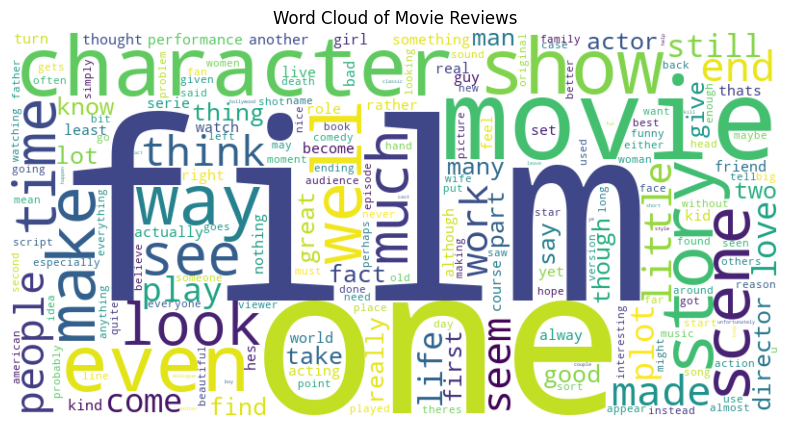

In [67]:
# Create a single string of all reviews
all_reviews = ' '.join(data['cleaned_review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title("Word Cloud of Movie Reviews")
plt.show()


#### Metrics

In [40]:
# Calculate the length of each review in terms of words
data['review_length'] = data['cleaned_review'].apply(lambda x: len(x.split()))

# Calculate the average length of the reviews
average_length = data['review_length'].mean()
print(f"Average length of texts (in words): {average_length:.2f}")


Average length of texts (in words): 121.56


In [41]:
# Create a set of all unique words
unique_words = set(all_words)

# Calculate the number of unique words
number_of_unique_words = len(unique_words)
print(f"Number of unique words: {number_of_unique_words}")


Number of unique words: 175747


**Characteristics of Observed Text Data**
The dataset contains frequent terms such as "movie," "film," and "good," indicating common themes in reviews. The average text length is approximately 121.56 words, with a total of 175,747 unique words, reflecting diverse vocabulary.

**Anticipated Challenges in Text Mining**
Challenges include handling noise (e.g., typos, informal language), sentiment ambiguity (e.g., sarcasm), and high dimensionality of data.

**Suggestions for Further Analysis**
To enhance analysis, consider using lemmatization or stemming for word normalization, exploring n-grams for context, and employing advanced models like BERT for sentiment analysis.
